In [17]:
import rebound

In [131]:
simID = 0
runstr = "{0:0=7d}.bin".format(simID)
sim = rebound.Simulation.from_file('../../data/random/initial_conditions/runs/ic'+runstr)
sim2 = rebound.Simulation.from_file('../../data/random/initial_conditions/shadowruns/ic'+runstr)

/mnt/raid-cita/dtamayo/j5/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


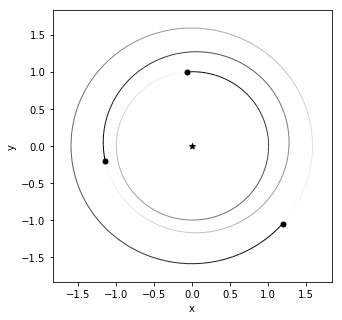

In [117]:
%matplotlib inline
rebound.OrbitPlot(sim);

In [118]:
sim2.particles[2].x-sim.particles[2].x

0.01379346201688536

In [119]:
sim2.particles[2].y-sim.particles[2].y

0.0024625781940623703

In [120]:
for p in sim.particles[1:]:
    print(p.orbit)

<rebound.Orbit instance, a=0.9999999999999994 e=0.005030898969180813 inc=0.008978295772836644 Omega=1.7708394029393855 omega=1.4002016342592063 f=-1.5343274365144592>
<rebound.Orbit instance, a=1.2215017573695912 e=0.05939088592053666 inc=0.014681285318935125 Omega=1.5739777634038006 omega=2.311349230922028 f=-0.5670809984183032>
<rebound.Orbit instance, a=1.589043367673458 e=0.002514512612611228 inc=0.06549765787793953 Omega=-1.1924402743421592 omega=1.0842782303119194 f=-0.6147094627399632>


In [121]:
sim3 = rebound.Simulation()
sim3.add(m=1.)
for p in sim.particles[1:]:
    sim3.add(m=p.m, a=p.a, inc=1.e-3, Omega = p.Omega, theta=p.f)

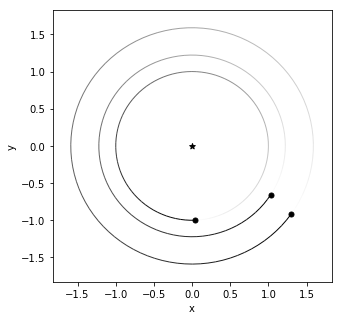

In [122]:
rebound.OrbitPlot(sim3);

In [123]:
sim3.integrate(1000.)

In [124]:
ps = sim3.particles
print(ps[1].e)
print(ps[1].inc)

0.0016626267122677146
0.001012111115600242


In [125]:
print(ps[2].e)
print(ps[2].inc)

0.0011517740010569203
0.0009799642914035006


In [126]:
print(ps[3].e)
print(ps[3].inc)

0.007367852048097759
0.00098247750316392


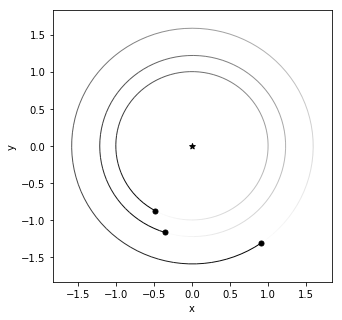

In [30]:
rebound.OrbitPlot(sim3);

In [31]:
sim4 = rebound.Simulation()
sim4.add(m=1.)
for p in sim.particles[1:]:
    sim4.add(m=p.m/10., a=p.a, inc=p.inc, Omega = p.Omega, theta=p.f)

In [32]:
sim4.integrate(100.)

In [33]:
ps = sim4.particles
ps[1].e

0.00021959523725466066

In [34]:
ps[2].e

0.0003909501199186499

In [35]:
ps[3].e

0.00025136074253777785

In [133]:
def run0(beta, sim):
    sim2 = rebound.Simulation()
    ps = sim.particles
    hill12 = ps[1].a*((ps[1].m+ps[2].m)/3.)**(1./3.)
    hill23 = ps[2].a*((ps[2].m+ps[3].m)/3.)**(1./3.)
    print(hill12, hill23)
    sim2.add(m=1.)
    sim2.add(m=ps[1].m, a=1., inc=ps[1].inc, Omega = ps[1].Omega, f=ps[1].f)
    sim2.add(m=ps[2].m, a=sim2.particles[1].a*(1.+beta*hill12), inc=ps[2].inc, Omega = ps[2].Omega, f=ps[2].f)
    sim2.add(m=ps[3].m, a=sim2.particles[2].a*(1.+beta*hill23), inc=ps[3].inc, Omega = ps[3].Omega, f=ps[3].f)
    
    sim2.integrate(1000.)
    return sim2

In [138]:
import numpy as np
N=100
betas = np.linspace(5,30,N)

In [129]:
e1s, e2s, e3s = np.zeros(N), np.zeros(N), np.zeros(N)
da12, da21, da23, da32 = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
for i, beta in enumerate(betas):
    sim2 = run0(beta, sim)
    ps = sim.particles
    e1s[i] = ps[1].e
    e2s[i] = ps[2].e
    e3s[i] = ps[3].e
    da12[i] = (ps[2].a-ps[1].a)/ps[1].a
    da21[i] = (ps[2].a-ps[1].a)/ps[2].a
    da23[i] = (ps[3].a-ps[2].a)/ps[2].a
    da32[i] = (ps[3].a-ps[2].a)/ps[3].a

KeyboardInterrupt: 

In [127]:
def run(beta, M):
    sim = rebound.Simulation()
    ps = sim.particles
    sim.add(m=1.)
    sim.add(m=M/10, a=1.)
    e_H = (2*M/3.)**(1./3.)
    sim.add(m=M, a=ps[1].a*(1+beta*e_H), theta=2.1)
    sim.add(m=M/5, a=ps[2].a*(1+beta*e_H), theta=4.3)
    sim.integrate(1000.)
    return sim

In [128]:
import numpy as np
N=100
betas = np.linspace(5,30,N)

In [129]:
M=1.e-7
e1s, e2s, e3s = np.zeros(N), np.zeros(N), np.zeros(N)
da12, da21, da23, da32 = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
for i, beta in enumerate(betas):
    sim = run(beta, M)
    ps = sim.particles
    e1s[i] = ps[1].e
    e2s[i] = ps[2].e
    e3s[i] = ps[3].e
    da12[i] = (ps[2].a-ps[1].a)/ps[1].a
    da21[i] = (ps[2].a-ps[1].a)/ps[2].a
    da23[i] = (ps[3].a-ps[2].a)/ps[2].a
    da32[i] = (ps[3].a-ps[2].a)/ps[3].a

KeyboardInterrupt: 

In [114]:
M1 = M/10
M2 = M
M3 = M/5
guess1 = M2/da12**2
guess2 = np.maximum(M1/da21**2, M3/da23**2)
guess3 = M2/da32**2

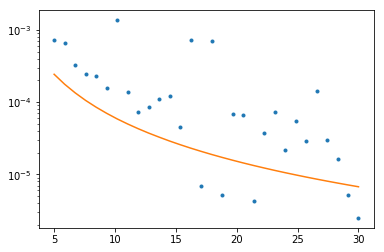

In [111]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(betas, e1s, '.')
ax.plot(betas, guess1)
ax.set_yscale('log')

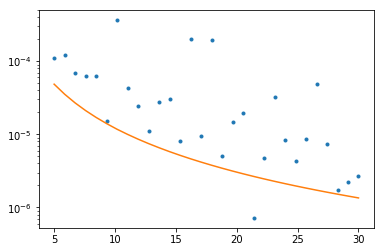

In [112]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(betas, e2s, '.')
ax.plot(betas, guess2)
ax.set_yscale('log')

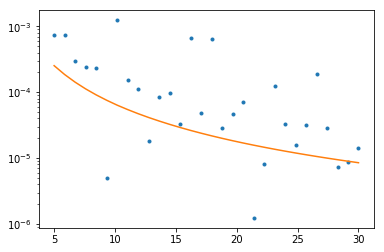

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(betas, e3s, '.')
ax.plot(betas, guess3)
ax.set_yscale('log')